In [1]:
import numpy as np                                        #Import neccesary analysis tools
import matplotlib.pyplot as plt
import scipy.optimize as spy
import pylab as plb

In [10]:
Na22Data = np.loadtxt('Na22.txt',skiprows=12,max_rows=2048)             #Loads in Data sets and assigns a variable to each
Co57Data = np.loadtxt('Co57.txt',skiprows=12,max_rows=2048)
Co60Data = np.loadtxt('Co60.txt',skiprows=12,max_rows=2048)
Cs137Data = np.loadtxt('Cs137.txt',skiprows=12,max_rows=2048)
AlFoilData1 = np.loadtxt('AlFoil0.7mil.txt',skiprows=12,max_rows=2048)
AlFoilData2 = np.loadtxt('AlFoil1mil.txt',skiprows=12,max_rows=2048)
AlData1 = np.loadtxt('Al0.025.txt',skiprows=12,max_rows=2048)
AlData2 = np.loadtxt('Al0.1.txt',skiprows=12,max_rows=2048)
PbData1 = np.loadtxt('Pb0.125.txt',skiprows=12,max_rows=2048)
PbData2 = np.loadtxt('Pb0.25.txt',skiprows=12,max_rows=2048)

Na-22 Data Curve Fitting

[470.14548027  24.37427555 573.43722136]
[1300.02710189  -49.89586413   56.03690338]


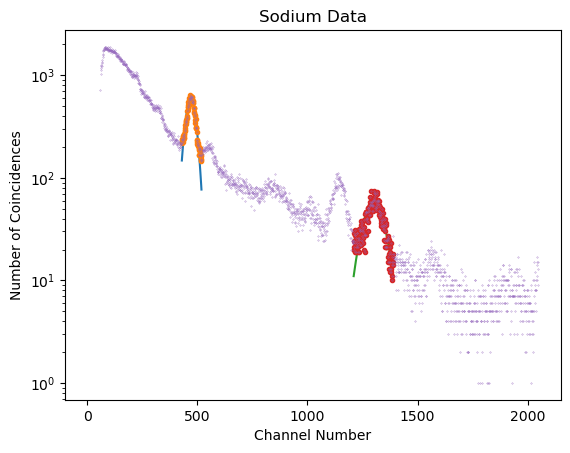

In [60]:
def GausFit(x,xbar,sigma,A):
    return A*np.exp(-(x-xbar)**2/(2*sigma**2))

############################################# First Peak #############################################

RngPkNa1 = range(430,520)
PkNa1 = 511

param0Na1 = (1000,480,1)
FitParamNa1,FitErrNa1 = spy.curve_fit(GausFit,RngPkNa1,Na22Data[430:520],param0Na1)

Na_Fit1 = GausFit(RngPkNa1,FitParamNa1[0],FitParamNa1[1],FitParamNa1[2])

plt.plot(RngPkNa1,Na_Fit1)

print(FitParamNa1)

plt.plot(RngPkNa1,Na22Data[430:520],'.')

############################################# Second Peak #############################################

RngPkNa2 = range(1210,1390)
PkNa2 = 1300

param0Na2 = (100,1300,1)
FitParamNa2,FitErrNa2 = spy.curve_fit(GausFit,RngPkNa2,Na22Data[1210:1390],param0Na2)

Na_Fit2 = GausFit(RngPkNa2,FitParamNa2[0],FitParamNa2[1],FitParamNa2[2])

plt.plot(RngPkNa2,Na_Fit2)

print(FitParamNa2)

plt.plot(RngPkNa2,Na22Data[1210:1390],'.')

############################################# Final Plot #############################################

plt.plot(Na22Data,'.',markersize=0.5)
plt.title("Sodium Data")
plt.ylabel("Number of Coincidences")
plt.xlabel("Channel Number")
plt.yscale('log')
plt.show()

Na-22 Data Offset Correction (Data Calibration)

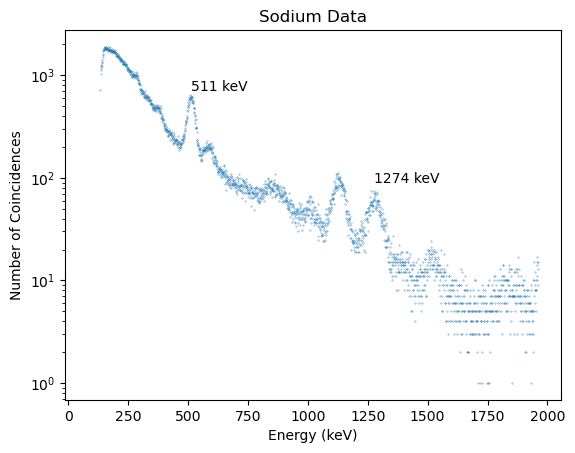

In [67]:
NaSlope = ((511-1274)/(FitParamNa1[0]-FitParamNa2[0]))

NaYint = 1274 - (NaSlope)*(FitParamNa2[0])

nArray = np.arange(0,len(Na22Data))

def FitLine(m,n,b):
    return (m*n) + b

NaFit = FitLine(NaSlope,nArray,NaYint)

plt.plot(NaFit,Na22Data,'.',markersize=0.5)
plt.title("Sodium Data")
plt.ylabel("Number of Coincidences")
plt.xlabel("Energy (keV)")
plt.text(511,700,'511 keV')
plt.text(1274,90,'1274 keV')
plt.yscale('log')
plt.show()

Co-57 Data

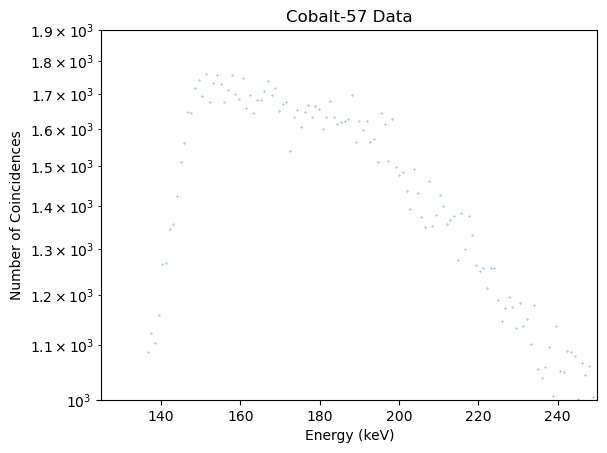

In [74]:
plt.plot(NaFit,Co57Data,'.',markersize=0.5)
plt.title("Cobalt-57 Data")
plt.ylabel("Number of Coincidences")
plt.xlabel("Energy (keV)")
plt.yscale('log')
plt.xlim(125,250)
plt.ylim(1000,1900)
plt.show()

Co-60 Data

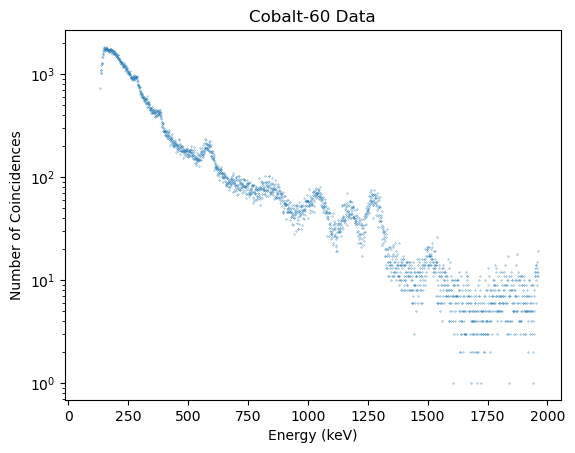

In [75]:
plt.plot(NaFit,Co60Data,'.',markersize=0.5)
plt.title("Cobalt-60 Data")
plt.ylabel("Number of Coincidences")
plt.xlabel("Energy (keV)")
plt.yscale('log')
plt.show()

Cs-137 Data

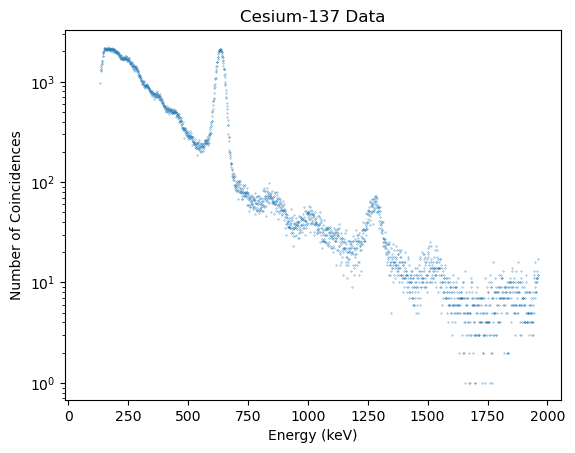

In [76]:
plt.plot(NaFit,Cs137Data,'.',markersize=0.5)
plt.title("Cesium-137 Data")
plt.ylabel("Number of Coincidences")
plt.xlabel("Energy (keV)")
plt.yscale('log')
plt.show()